# Character Recognition using SVM (Support Vector Machine) #

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [2]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
print(digits.data[-5:])

[[  0.   0.   4.  10.  13.   6.   0.   0.   0.   1.  16.  14.  12.  16.
    3.   0.   0.   4.  16.   6.   3.  16.   4.   0.   0.   0.  12.  16.
   16.  16.   5.   0.   0.   0.   0.   4.   4.  16.   8.   0.   0.   0.
    0.   0.   0.  15.   5.   0.   0.   0.   5.   7.   7.  16.   4.   0.
    0.   0.   2.  14.  15.   9.   0.   0.]
 [  0.   0.   6.  16.  13.  11.   1.   0.   0.   0.  16.  15.  12.  16.
    1.   0.   0.   3.  16.   7.   0.  13.   6.   0.   0.   4.  16.   0.
    0.  10.   8.   0.   0.   8.  16.   0.   0.  14.   6.   0.   0.   5.
   16.   7.   9.  16.   5.   0.   0.   1.  15.  16.  16.  16.   1.   0.
    0.   0.   6.  16.  14.   6.   0.   0.]
 [  0.   0.   1.  11.  15.   1.   0.   0.   0.   0.  13.  16.   8.   2.
    1.   0.   0.   0.  16.  15.  10.  16.   5.   0.   0.   0.   8.  16.
   16.   7.   0.   0.   0.   0.   9.  16.  16.   4.   0.   0.   0.   0.
   16.  14.  16.  15.   0.   0.   0.   0.  15.  15.  15.  16.   0.   0.
    0.   0.   2.   9.  13.   6.   0.   0.]
 [  0. 

In [4]:
print(digits.target[-5:])

[9 0 8 9 8]


In [5]:
X,y = digits.data[:-10], digits.target[:-10]

In [6]:
# defaults:
# gamma = auto = 1/n_features = 1/64 = 0.01
# C = 0.01
clf = svm.SVC()
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
test_data = digits.data[-2].reshape(1,-1) # to avoid deprecated warning for passing 1d arrays as data
print(clf.predict(test_data))
print(digits.target[-2])

[5]
9


### Choosing the parameters of the model ###
In this example we set the value of gamma manually. It is possible to automatically find good values for the parameters by using tools such as [grid search](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) and [cross validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [8]:
# as gamma and C point to 'pay more attention to detail', we get better accuracy, but with less speed
clf_arg = svm.SVC(gamma=0.001, C=100)
clf_arg.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
test_data_arg = digits.data[-2].reshape(1,-1)
print(clf_arg.predict(test_data_arg))
print(digits.target[-2])

[9]
9


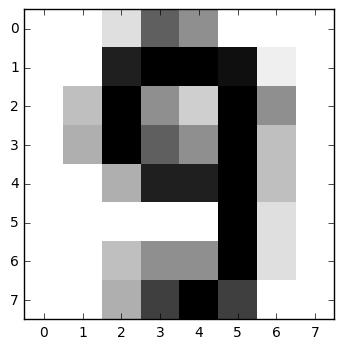

In [10]:
# visualize the target
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [32]:
from __future__ import print_function

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'rbf', 'gamma': 0.001}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.959 (+/-0.029) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.988 (+/-0.017) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.982 (+/-0.026) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.988 (+/-0.017) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.982 (+/-0.025) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.988 (+/-0.017) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.982 (+/-0.025) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

In [12]:
import sklearn

In [13]:
sklearn.__version__

'0.18.1'